## Model Evaluation (model v2)

#### Import relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
from joblib import dump, load

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import mean_absolute_error, mean_squared_error from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Load model_fit file

In [3]:
#directory (folder) for model v2
input_dir = os.path.join('..', 'data', 'processed', 'model_v2')

plots_dir = os.path.join('..', 'data', 'figures', 'model_v2')

lin_model = load(os.path.join(input_dir, 'lin_model_v2_1.joblib'))
rf_model = load(os.path.join(input_dir, 'forest_model_v2_1.joblib'))
nnet_model = load(os.path.join(input_dir, 'neural_model_v2_1.joblib'))

#### Load in test and train data

In [4]:
X_train = pd.read_csv(os.path.join(input_dir, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(input_dir, 'X_test.csv'))
y_train = np.array(pd.read_csv(os.path.join(input_dir, 'y_train.csv'))['target'])
y_test = np.array(pd.read_csv(os.path.join(input_dir, 'y_test.csv'))['target'])

In [5]:
X_train = X_train.rename(columns={
    'c10_other_wires': 'c10a',
    'c10_restructured': 'c10b',
    'c10_vert_int': 'c10c',
    
})
X_test = X_test.rename(columns={
    'c10_other_wires': 'c10a',
    'c10_restructured': 'c10b',
    'c10_vert_int': 'c10c',
    
})

#### Predict on test set using trained models

In [6]:
y_pred_lin = lin_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nnet = nnet_model.predict(X_test)

/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c10a
- c10b
- c10c
Feature names seen at fit time, yet now missing:
- c10_other_wires
- c10_restructured
- c10_vert_int

  warnings.warn(message, FutureWarning)
/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c10a
- c10b
- c10c
Feature names seen at fit time, yet now missing:
- c10_other_wires
- c10_restructured
- c10_vert_int

  warnings.warn(message, FutureWarning)
/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Featur

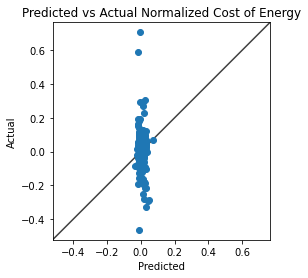

In [7]:
lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})

fig, ax = plt.subplots()
ax.scatter(y_pred_lin, y_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predicted vs Actual Normalized Cost of Energy')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig(os.path.join(plots_dir, 'lm_actual_vs_pred_scatter.png'), dpi=300)

In [8]:
# lin_df[lin_df['Actual'] > 10]
lin_df

,Actual,Predicted
0,0.012256,0.003374
1,-0.189246,0.010853
2,0.033146,0.013560
3,0.109113,-0.009017
4,0.023391,0.006566
...,...,...
209,-0.463100,-0.007271
210,-0.004762,0.017239
211,0.035918,0.031440
212,0.041148,0.012185


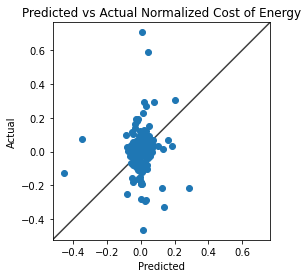

In [9]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

fig, ax = plt.subplots()
ax.scatter(y_pred_rf, y_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predicted vs Actual Normalized Cost of Energy')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig(os.path.join(plots_dir, 'rf_actual_vs_pred_scatter.png'), dpi=300)

#### Compute fit statistics

(a) Bias := $\sum (\hat{y_i} - y_i) $

In [10]:
bias_lin = sum(y_pred_lin - y_test)
bias_rf = sum(y_pred_rf - y_test)

print("Bias of Linear Regression: {}".format(bias_lin))
print("Bias of Random Forest: {}".format(bias_rf))

Bias of Linear Regression: -1.0641613880895415
Bias of Random Forest: -1.8305961435994764


(b) Mean Absolute Error := $\frac{1}{n} \sum |\hat{y_i} - y_i|$

In [11]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("MAE of Linear Regression: {}".format(mae_lin))
print("MAE of Random Forest Model: {}".format(mae_rf))

MAE of Linear Regression: 0.06949528837028957
MAE of Random Forest Model: 0.07883170342205613


(c) Root Mean Square Error := $\sqrt{\frac{1}{n} \sum (\hat{y_i} - y_i)^2}$

In [12]:
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("RMSE of Linear Regression: {}".format(rmse_lin))
print("RMSE of Random Forest: {}".format(rmse_rf))

RMSE of Linear Regression: 0.1190872844242237
RMSE of Random Forest: 0.12826215287266174


(d) R squared := $1 - \frac{RSS}{TSS}$ := $1- \frac{\sum (\hat{y_i}-y_i)^2}{\sum (y_i - \mu)^2}$

In [13]:
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)

print("R^2 of Linear Regression: {}".format(r2_lin))
print("R^2 of Random Forest: {}".format(r2_rf))

R^2 of Linear Regression: -0.04396912079964799
R^2 of Random Forest: -0.21102726073628797


[0.16063229 0.06886086 0.21655519 0.13665512 0.12374909 0.0586059
 0.05907996 0.02419852 0.1143273  0.02237051 0.00319686 0.01176841]


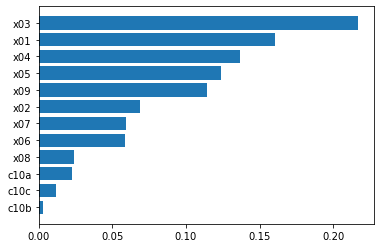

In [14]:
print(rf_model.feature_importances_)
variable_importance_df = pd.DataFrame({
    'variable': np.array(['x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08', 'x09', 'c10a', 'c10b', 'c10c']),
    'values': rf_model.feature_importances_,
})
variable_importance_df = variable_importance_df.sort_values(by=['values'])
plt.barh(variable_importance_df['variable'], variable_importance_df['values'])
plt.savefig(os.path.join(plots_dir, 'rf_variable_importance_plot.png'), dpi=300)

#### Coefficient value estimates, p-values and std error for each feature variable

In [15]:
results = pd.DataFrame({
    'variables': X_train.columns,
    'coeff': lin_model.coef_,
})
results

,variables,coeff
0,x01,-0.003054
1,x02,0.002965
2,x03,-0.007123
3,x04,-0.004342
4,x05,0.000288
5,x06,0.004245
6,x07,0.003681
7,x08,-0.006889
8,x09,0.001092
9,c10a,-0.054688


Train fit analysis from OLS statsmodel package

In [16]:
import statsmodels.api as sm

In [17]:
X2_train = sm.add_constant(X_train)
ols_result = sm.OLS(y_train, X2_train).fit()
ols_result.summary()

/home/julian/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.492
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.121
Time:                        14:00:06   Log-Likelihood:                 661.76
No. Observations:                 852   AIC:                            -1298.
Df Residuals:                     839   BIC:                            -1236.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0435      0.057      0.763      0.446      -0.069       0.156
x01           -0.0031      0.005     -0.661      0.509      -0.012       0.006
x02            0.0030      0.004      0.729      0.466      -0.005       0.011
x03           -0.0071      0.004     -1.590      0.112      -0.016       0.002
x04           -0.0043      0.004     -1.121      0.263      -0.012       0.003
x05            0.0003      0.005      0.064      0.949      -0.009       0.009
x06            0.0042      0.005      0.921      0.357      -0.005       0.013
x07            0.0037      0.004      0.935      0.350      -0.004       0.011
x08           -0.0069      0.006     -1.206      0.228      -0.018       0.004
x09            0.0011      0.005      0.236      0.814      -0.008       0.010
c10a          -0.0547      0.058     -0.944      0.345      -0.168       0.059
c10b          -0.0322      0.059     -0.545      0.586      -0.148       0.084
c10c          -0.0292      0.058     -0.508      0.612      -0.142       0.084
==============================================================================
Omnibus:                      597.093   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34891.535
Skew:                           2.520   Prob(JB):                         0.00
Kurtosis:                      33.943   Cond. No.                         42.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Partial dependence plots